<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features +  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features +  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <li><strong>The hyper paramter tuning (best `depth` in range [1, 5, 10, 50], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use gridsearch cv or randomsearch cv)/simple cross validation data(you can write your own for loops refer sample solution)</li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>min_sample_split</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud(https://www.geeksforgeeks.org/generating-word-cloud-python/) with the words of essay text of these `false positive data points`</li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
   <li><b>Task 2: </b>For this task consider set-1 features. Select all the features which are having non-zero feature importance.You can get the feature importance using  'feature_importances_` 
   (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), discard the all other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3<br>
  Note: when you want to find the feature importance make sure you don't use max_depth parameter keep it None.
  </li>
    <br>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

<h1>1. Decision Tree </h1>

## 1.1 Loading Data

In [0]:
!pip install chart_studio

     |████████████████████████████████| 71kB 2.7MB/s 


In [0]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd 
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/

from scipy.sparse import hstack 
from chart_studio import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
import pickle
from tqdm import tqdm
import importlib
import os

from collections import Counter

Output hidden; open in https://colab.research.google.com to view.

In [0]:
!pip install -U -q PyDrive

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#logging to avoid discovery_cache error
import logging
logging.getLogger('googleapiclient.discovery_cache').setLevel(logging.ERROR)

In [0]:
#Get Id of data file and load data in Google Colab

file_list = drive.ListFile({'q': "'1i9ayDXq4ikTbhBTbxFrjEOS5kPb5lvmb' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

title: 9_Assignment_DT_Instructions.ipynb, id: 1VEsxcXZZ0GCZY8xTGPJ-qWK1l11aGkzL
title: 11_Assignment_GBDT_Instructions.ipynb, id: 1rYuFtmyXYbs89ly7fXxkygzQeoYLfTLL
title: preprocessed_data.csv, id: 1OPrzt5dhw5wt5maEpJ-4mwD8lUZQ3S1h
title: LSTM - Assignment.ipynb, id: 1VyrMYh0Fhs-DhGAEkExmFS43bKMLTiyt
title: glove_vectors, id: 1BtXg_aXwqNCngD4gGdFrJzR37Ck1_MkI
title: train_data.csv, id: 1Xia-TFXlTSNomh8pNRKROEYSAciPDLNb
title: resources.csv, id: 1U1Ou37rB2rf1TKQ_4LbUfNuz6P3scXny


In [0]:
data_downloaded = drive.CreateFile({'id': '1Xia-TFXlTSNomh8pNRKROEYSAciPDLNb'})
data_downloaded.GetContentFile('train_data.csv')

In [0]:
data_downloaded = drive.CreateFile({'id': '1U1Ou37rB2rf1TKQ_4LbUfNuz6P3scXny'})
data_downloaded.GetContentFile('resources.csv')

In [0]:
data_downloaded = drive.CreateFile({'id': '1BtXg_aXwqNCngD4gGdFrJzR37Ck1_MkI'})
data_downloaded.GetContentFile('glove_vectors')

# https://drive.google.com/file/d/1BtXg_aXwqNCngD4gGdFrJzR37Ck1_MkI/view?usp=sharing

In [0]:
train_data = pd.read_csv('train_data.csv') #,engine='python', encoding='utf-8', error_bad_lines=False)
train_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"History & Civics, Health & Sports","Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1


In [0]:
print("Number of data points in train data", train_data.shape)
print('-'*50)
print("The attributes of data :", train_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [0]:

# Pre-processing of project_subject_categories
categories = list(train_data['project_subject_categories'].values)

cat_list = []
for i in categories:
    temp = ""
    for j in i.split(','):
        if 'The' in j.split():
            j = j.replace('The', '')
        j = j.replace(' ', '')
        temp += j.strip() + " "
        temp = temp.replace('&', '_')
        temp = temp.replace(',','_')
        temp = temp.lower()
    cat_list.append(temp.strip())
    
train_data['preprocessed_subject_categories'] = cat_list
train_data.drop(['project_subject_categories'], axis =1, inplace = True)


from collections import Counter
my_counter = Counter()
for word in train_data['preprocessed_subject_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))

In [0]:
# Pre-processing of project_subject_subcategories
sub_catogories = list(train_data['project_subject_subcategories'].values)

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    for j in i.split(','):
        if 'The' in j.split(): 
            j=j.replace('The','') 
        j = j.replace(' ','')
        temp +=j.strip()+" "
        temp = temp.replace('&','_')
        temp = temp.replace(',','_')
        temp = temp.lower()
    sub_cat_list.append(temp.strip())

train_data['preprocessed_subject_subcategories'] = sub_cat_list
train_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in train_data['preprocessed_subject_subcategories'].values:
    my_counter.update(word.split())

sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

In [0]:
# Pre-processing of 'project_essay_1' 'project_essay_2' 'project_essay_3' 'project_essay_4'
train_data['essay'] = train_data['project_essay_1'].map(str)  +\
                      train_data['project_essay_2'].map(str) +\
                      train_data['project_essay_3'].map(str)  +\
                      train_data['project_essay_4'].map(str)  

In [0]:
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
"you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their'
'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those'
'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do',
'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while',
'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before'
'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again'
'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few'
'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm',
've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't",
"hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn'
"mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren'
'won', "won't", 'wouldn', "wouldn't"]

import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [0]:
# Combining all of the above 
from tqdm import tqdm
def preprocess_text(text_data):
    preprocessed_text = []
    # tqdm is for printing the status bar
    for sentence in tqdm(text_data):
        sent = decontracted(sentence)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\n', ' ')
        sent = sent.replace('\\"', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        # https://gist.github.com/sebleier/554280
        sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
        preprocessed_text.append(sent.lower().strip())
    return preprocessed_text

preprocessed_essays = preprocess_text(train_data['essay'].values)

100%|██████████| 109248/109248 [00:52<00:00, 2076.26it/s]


In [0]:
# Pre-processing of 'project_title'
from tqdm import tqdm
def preprocess_text(text_data):
    preprocessed_text = []
    # tqdm is for printing the status bar
    for sentence in tqdm(text_data):
        sent = decontracted(sentence)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\n', ' ')
        sent = sent.replace('\\"', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        # https://gist.github.com/sebleier/554280
        sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
        preprocessed_text.append(sent.lower().strip())
    return preprocessed_text

preprocessed_titles = preprocess_text(train_data['project_title'].values)

100%|██████████| 109248/109248 [00:02<00:00, 50417.04it/s]


In [0]:
# Pre-processing of 'project_grade_category'
def preprocess_text(text):
    preprocessed_text = []
    for sentence in tqdm(text):
        sent = sentence.replace(' ','_')
        sent = sent.replace('-','_')
        sent = sent.lower()
        preprocessed_text.append(sent)
    return preprocessed_text
    
preprocessed_grade_categories = preprocess_text(train_data['project_grade_category'].values)

100%|██████████| 109248/109248 [00:00<00:00, 1356593.57it/s]


In [0]:
resource_data = pd.read_csv('resources.csv') #,engine='python', encoding='utf-8', error_bad_lines=False)
resource_data.head(3)

,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95
2,p069063,Cory Stories: A Kid's Book About Living With Adhd,1,8.45


<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    
train_data['teacher_prefix_cleaned'] = (train_data['teacher_prefix'].fillna(" ").replace('\.', ' ', regex=True).str.lower())
train_data.drop(['teacher_prefix'], axis=1, inplace=True)
# combine clean essay,title in project
train_data['preprocessed_essay'] = preprocessed_essays
train_data['preprocessed_title'] = preprocessed_titles
train_data['preprocessed_grade_category'] = preprocessed_grade_categories

del preprocessed_essays, preprocessed_titles, preprocessed_grade_categories

train_data.drop(['project_title'], axis=1, inplace=True)
train_data.drop(['essay'], axis=1, inplace=True)
train_data.drop(['project_essay_1'], axis=1, inplace=True)
train_data.drop(['project_essay_2'], axis=1, inplace=True)
train_data.drop(['project_essay_3'], axis=1, inplace=True)
train_data.drop(['project_essay_4'], axis=1, inplace=True)
train_data.drop(['project_grade_category'], axis=1, inplace=True)

train_data['school_state'] = train_data['school_state'].str.lower()

price_data = resource_data.groupby('id').agg({'price': 'sum', 'quantity': 'sum'}).reset_index()
train_data = pd.merge(train_data, price_data, on='id', how='left')

train_data.to_csv('task_2_data.csv')

y = train_data['project_is_approved'].values  # target
# drop target column from project data
train_data.drop(['project_is_approved'], axis=1, inplace=True)
train_data.drop(['Unnamed: 0'], axis=1, inplace=True)
train_data.drop(['id'], axis=1, inplace=True)
train_data.drop(['teacher_id'], axis=1, inplace=True)

X = train_data

# Splitting train data and test data with 2/3rd as train and 1/3rd as test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

# # Splitting train data and cross-validation data with 2/3rd as train and 1/3rd as cross-validation
# X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size = 0.33, stratify = y_train)

In [0]:
X_train.head(3)

,school_state,project_submitted_datetime,project_resource_summary,teacher_number_of_previously_posted_projects,preprocessed_subject_categories,preprocessed_subject_subcategories,teacher_prefix_cleaned,preprocessed_essay,preprocessed_title,preprocessed_grade_category,price,quantity
22769,sc,2016-08-12 09:21:49,My students need a variety of unpitched instru...,7,music_arts,music,mrs,new year need gear after assessing inventory o...,need gear great year part 1 instruments,grades_3_5,26.15,31
95257,sc,2016-09-12 10:52:53,My students need these clip-on tuners to attac...,1,music_arts,music performingarts,mrs,students super hard working mostly privileged ...,tuners tribe,grades_9_12,29.99,10
92277,md,2016-06-27 06:59:43,My students need this colorful carpet to reinf...,8,specialneeds,specialneeds,ms,wonderful group of fifteen special needs child...,carpet carpet art thou,grades_prek_2,479.00,1


In [0]:
print(X_train.shape)
# print(X_cv.shape)
print(X_test.shape)

(73196, 12)
(36052, 12)


In [0]:
print(X_train['teacher_prefix_cleaned'].nunique())
# print(X_cv['teacher_prefix_cleaned'].nunique())

6


In [0]:
print("Number of data points in train data: ", X_train.shape)
print('-'*50)
print("Attributes of train data: ", X_train.columns.values)

Number of data points in train data:  (73196, 12)
--------------------------------------------------
Attributes of train data:  ['school_state' 'project_submitted_datetime' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects'
 'preprocessed_subject_categories' 'preprocessed_subject_subcategories'
 'teacher_prefix_cleaned' 'preprocessed_essay' 'preprocessed_title'
 'preprocessed_grade_category' 'price' 'quantity']


In [0]:
tfidf_features = list()
tfidf_w2v_features = list()

<h2>1.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    
from scipy.sparse import hstack

def tfidf_text(train_text, test_text):
    
   vectorizer = TfidfVectorizer(min_df = 1, ngram_range = (1, 4), max_features = 5000)
   vectorizer.fit(train_text.values)
    
#     Using fitted TfidfVectorizer to convert text to vector
   train_text_tfidf = vectorizer.transform(train_text.values)
#     cv_text_tfidf= vectorizer.transform(cv_text.values)
   test_text_tfidf = vectorizer.transform(test_text.values)
   text_features = vectorizer.get_feature_names()
    
#     Encoded values
   return train_text_tfidf, test_text_tfidf, vectorizer, text_features 

#tfidf essay
essay_train_tfidf, essay_test_tfidf, tfidf_vectorizer_1, essay_features = tfidf_text(X_train['preprocessed_essay'], X_test['preprocessed_essay'])

#tfidf title
title_train_tfidf, title_test_tfidf, tfidf_vectorizer_2, title_features = tfidf_text(X_train['preprocessed_title'], X_test['preprocessed_title'])

tfidf_features = essay_features + title_features
tfidf_features += tfidf_features

In [0]:
from scipy.sparse import hstack
from gensim.test.utils import common_texts
from gensim.sklearn_api import W2VTransformer
import gensim
from gensim.models import Word2Vec
import pickle
import io

with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

    
def tfidf_w2v_text(list_of_texts):
    X_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in list_of_texts: # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        tf_idf_weight =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if (word in glove_words) and (word in tfidf_words):
                vec = model[word] # getting the vector for each word
                # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        X_tfidf_w2v_vectors.append(vector)
        
    return X_tfidf_w2v_vectors
    
#     Encoded values
#     return train_text_tfidf_w2v, cv_text_tfidf_w2v, test_text_tfidf_w2v, vectorizer, vectorizer.get_feature_names()

#tfidf_w2v essay
# essay_train_tfidf_w2v, essay_cv_tfidf_w2v, essay_test_tfidf_w2v, tfidf_w2v_vectorizer_1 = tfidf_w2v_text(X_train['essay'], X_cv['essay'], X_test['essay'])
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['preprocessed_essay'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

essay_train_tfidf_w2v = tfidf_w2v_text(X_train['preprocessed_essay'].values)
# essay_cv_tfidf_w2v = tfidf_w2v_text(X_cv['essay'].values)
essay_test_tfidf_w2v = tfidf_w2v_text(X_test['preprocessed_essay'].values)

tfidf_w2v_features += tfidf_words

In [0]:
from scipy.sparse import hstack
from gensim.test.utils import common_texts
from gensim.sklearn_api import W2VTransformer
import gensim
from gensim.models import Word2Vec
import pickle

# with open('glove_vectors', 'rb') as f:
#     model = pickle.load(f) 
#     glove_words =  set(model.keys())
    
def tfidf_w2v_text(list_of_texts):
    X_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in list_of_texts: # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        tf_idf_weight =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if (word in glove_words) and (word in tfidf_words):
                vec = model[word] # getting the vector for each word
                # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        X_tfidf_w2v_vectors.append(vector)
        
    return X_tfidf_w2v_vectors
    
#     Encoded values
#     return train_text_tfidf_w2v, cv_text_tfidf_w2v, test_text_tfidf_w2v, vectorizer, vectorizer.get_feature_names()

#tfidf_w2v essay
# essay_train_tfidf_w2v, essay_cv_tfidf_w2v, essay_test_tfidf_w2v, tfidf_w2v_vectorizer_1 = tfidf_w2v_text(X_train['essay'], X_cv['essay'], X_test['essay'])
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['preprocessed_title'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

title_train_tfidf_w2v = tfidf_w2v_text(X_train['preprocessed_title'].values)
# essay_cv_tfidf_w2v = tfidf_w2v_text(X_cv['essay'].values)
title_test_tfidf_w2v = tfidf_w2v_text(X_test['preprocessed_title'].values)

tfidf_w2v_features += tfidf_words

<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    
from sklearn.preprocessing import Normalizer
# from scipy.sparse import hstack

def normalize_numeric(train_num, test_num):
   norm = Normalizer()
   norm.fit(train_num.values.reshape(-1, 1))
    
   train_num_norm = norm.transform(train_num.values.reshape(-1, 1))
#     cv_num_norm = norm.transform(cv_num.values.reshape(-1, 1))
   test_num_norm = norm.transform(test_num.values.reshape(-1, 1))
   return train_num_norm, test_num_norm

# normalize teacher_number_of_previously_posted_projects
n1_train_norm, n1_test_norm = normalize_numeric(X_train['teacher_number_of_previously_posted_projects'], X_test['teacher_number_of_previously_posted_projects'])
# normalize price
n2_train_norm, n2_test_norm = normalize_numeric(X_train['price'], X_test['price'])
                                                                  
# normalize quantity
n3_train_norm, n3_test_norm = normalize_numeric(X_train['quantity'], X_test['quantity'])

tfidf_features += ['teacher_number_of_previously_posted_projects'] + ['price'] + ['quantity']
tfidf_w2v_features += ['teacher_number_of_previously_posted_projects'] + ['price'] + ['quantity']

In [0]:
# encoding categorical features: school_state
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data
# we use the fitted CountVectorizer to convert the text to vector
X_tr_state_ohe = vectorizer.transform(X_train['school_state'].values)
# X_cv_state_ohe = vectorizer.transform(X_cv['school_state'].values)
X_te_state_ohe = vectorizer.transform(X_test['school_state'].values)
tfidf_features += vectorizer.get_feature_names()
tfidf_w2v_features += vectorizer.get_feature_names()

# encoding categorical features: teacher_prefix_cleaned
vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix_cleaned'].values) # fit has to happen only on train dat
# we use the fitted CountVectorizer to convert the text to vector
X_tr_teacher_ohe = vectorizer.transform(X_train['teacher_prefix_cleaned'].values)
# X_cv_teacher_ohe = vectorizer.transform(X_cv['teacher_prefix_cleaned'].values)
X_te_teacher_ohe = vectorizer.transform(X_test['teacher_prefix_cleaned'].values)
tfidf_features += vectorizer.get_feature_names()
tfidf_w2v_features += vectorizer.get_feature_names()

# encoding categorical features: preprocessed_subject_categories
vectorizer = CountVectorizer()
vectorizer.fit(X_train['preprocessed_subject_categories'].values) # fit has to happen only on train data
# we use the fitted CountVectorizer to convert the text to vector
X_tr_category_ohe = vectorizer.transform(X_train['preprocessed_subject_categories'].values)
# X_cv_category_ohe = vectorizer.transform(X_cv['preprocessed_subject_categories'].values)
X_te_category_ohe = vectorizer.transform(X_test['preprocessed_subject_categories'].values)
tfidf_features += vectorizer.get_feature_names()
tfidf_w2v_features += vectorizer.get_feature_names()
    
# encoding categorical features: preprocessed_subject_subcategories
vectorizer = CountVectorizer()
vectorizer.fit(X_train['preprocessed_subject_subcategories'].values) # fit has to happen only on train data
# we use the fitted CountVectorizer to convert the text to vector
X_tr_subcategory_ohe = vectorizer.transform(X_train['preprocessed_subject_subcategories'].values)
# X_cv_subcategory_ohe = vectorizer.transform(X_cv['preprocessed_subject_subcategories'].values)
X_te_subcategory_ohe = vectorizer.transform(X_test['preprocessed_subject_subcategories'].values)
tfidf_features += vectorizer.get_feature_names()
tfidf_w2v_features += vectorizer.get_feature_names()

# encoding categorical features: preprocessed_grade_category
vectorizer = CountVectorizer()
vectorizer.fit(X_train['preprocessed_grade_category'].values) # fit has to happen only on train data
# we use the fitted CountVectorizer to convert the text to vector
X_tr_grade_ohe = vectorizer.transform(X_train['preprocessed_grade_category'].values)
# X_cv_grade_ohe = vectorizer.transform(X_cv['preprocessed_grade_category'].values)
X_te_grade_ohe = vectorizer.transform(X_test['preprocessed_grade_category'].values)
tfidf_features += vectorizer.get_feature_names()
tfidf_w2v_features += vectorizer.get_feature_names()

<h2>1.5 Appling  Decision Tree on different kind of featurization as mentioned in the instructions</h2>

<br>Apply  Decision Tree on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    
# Set 1: categorical, numerical features + preprocessed_eassay (TFIDF)  
X_tr_set_1 = hstack((essay_train_tfidf, title_train_tfidf, X_tr_state_ohe, X_tr_teacher_ohe, X_tr_category_ohe, X_tr_subcategory_ohe, X_tr_grade_ohe, n1_train_norm, n2_train_norm, n3_train_norm)).tocsr()
# X_cv_set_2 = hstack((essay_cv_tfidf, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_category_ohe, X_cv_subcategory_ohe, X_cv_grade_ohe, n1_cv_norm, n2_cv_norm)).tocsr()
X_te_set_1 = hstack((essay_test_tfidf, title_test_tfidf, X_te_state_ohe, X_te_teacher_ohe, X_te_category_ohe, X_te_subcategory_ohe, X_te_grade_ohe, n1_test_norm, n2_test_norm, n3_test_norm,)).tocsr()

print("Final Data Matrix of SET 1--\n")
print(X_tr_set_1.shape, y_train.shape)
# print(X_cv_set_2.shape, y_cv.shape)
print(X_te_set_1.shape, y_test.shape)

Final Data Matrix of SET 1--

(73196, 10102) (73196,)
(36052, 10102) (36052,)


In [0]:
from scipy.sparse import csr_matrix

# Set 2: categorical, numerical features + preprocessed_eassay (TFIDF W2V)  
X_tr_set_2 = hstack((csr_matrix(essay_train_tfidf_w2v), csr_matrix(title_train_tfidf_w2v), X_tr_state_ohe, X_tr_teacher_ohe, X_tr_category_ohe, X_tr_subcategory_ohe, X_tr_grade_ohe, n1_train_norm, n2_train_norm, n3_train_norm)).tocsr()
# X_cv_set_2 = hstack((essay_cv_tfidf, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_category_ohe, X_cv_subcategory_ohe, X_cv_grade_ohe, n1_cv_norm, n2_cv_norm)).tocsr()
X_te_set_2 = hstack((csr_matrix(essay_test_tfidf_w2v), csr_matrix(title_test_tfidf_w2v), X_te_state_ohe, X_te_teacher_ohe, X_te_category_ohe, X_te_subcategory_ohe, X_te_grade_ohe, n1_test_norm, n2_test_norm, n3_test_norm)).tocsr()

print("Final Data Matrix of SET 2--\n")
print(X_tr_set_2.shape, y_train.shape)
# print(X_cv_set_2.shape, y_cv.shape)
print(X_te_set_2.shape, y_test.shape)

Final Data Matrix of SET 2--

(73196, 702) (73196,)
(36052, 702) (36052,)


<h3>Training</h3>

Hyper-parameter Tuning using TFIDF Features(with better visualization)

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
import math
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
import numpy as np

model_DT = DecisionTreeClassifier(class_weight = 'balanced')

parameters = {'max_depth': [1, 5, 10, 50], 'min_samples_split': [5, 10,100,500]}

clf_1 = RandomizedSearchCV(model_DT, parameters, return_train_score=True, scoring='roc_auc', n_jobs= -1)
clf_1.fit(X_tr_set_1, y_train)

results = pd.DataFrame.from_dict(clf_1.cv_results_)
results = results.sort_values(['param_min_samples_split'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
# alphas =  results['param_alpha']
max_depth = results['param_max_depth'] 
min_samples_split =  results['param_min_samples_split']

from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(xs=min_samples_split, ys=max_depth, zs=train_auc, c='b', marker='o', label='blue')
ax.scatter(xs=min_samples_split, ys=max_depth, zs=cv_auc, c='g', marker='D', label='green')

ax.set_xlabel('min_samples_split')
ax.set_ylabel('max_depth')
ax.set_zlabel('AUC')
plt.title("3D Scatter Plot Example")
plt.legend()
plt.tight_layout()
plt.show()

############################################################################
# # https://plot.ly/python/3d-axes/
# trace1 = go.Scatter3d(x=min_samples_split, y=max_depth, z=train_auc, name='Train')
# trace2 = go.Scatter3d(x=min_samples_split, y=max_depth, z=cv_auc, name='Cross-validation')
# data = [trace1, trace2]

# layout = go.Layout(scene = dict(
#         xaxis = dict(title='min_samples_split'),
#         yaxis = dict(title='max_depth'),
#         zaxis = dict(title='AUC'),))

# fig = go.Figure(data=data, layout=layout)
# offline.iplot(fig, filename='3d-scatter-colorscale')
############################################################################
# # log_alphas =[]
# # for a in alphas:
# #     log_alphas.append(math.log(a))

# # plt.figure(figsize=(10,10))

# # plt.plot(log_alphas, train_auc, label='Train AUC')
# # # this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# # # plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

# # plt.plot(log_alphas, cv_auc, label='CV AUC')
# # # this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# # # plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

# plt.scatter(log_alphas, train_auc, label='Train AUC points')
# plt.scatter(log_alphas, cv_auc, label='CV AUC points')

# plt.legend()
# plt.xlabel("Hyper-parameter")
# plt.ylabel("Area under ROC Curve")
# plt.title("Hyper-parameter vs Area under ROC Curve")
# plt.grid()
# plt.show()

results.head(2)

Output hidden; open in https://colab.research.google.com to view.

In [0]:
print(clf_1.best_estimator_)
best_max_depth_tfidf = clf_1.best_estimator_.max_depth
best_min_samples_split_tfidf = clf_1.best_estimator_.min_samples_split

print('Best value of hyper-parameter(max_depth) by RandomizedSearchCV on TFIDF Vectorization: ', best_max_depth_tfidf)
print('Best value of hyper-parameter(min_samples_split) by RandomizedSearchCV on TFIDF Vectorization: ', best_min_samples_split_tfidf)
print('Best score: ', clf_1.best_score_)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Best value of hyper-parameter(max_depth) by RandomizedSearchCV on TFIDF Vectorization:  10
Best value of hyper-parameter(min_samples_split) by RandomizedSearchCV on TFIDF Vectorization:  500
Best score:  0.6274777052172246


Hyper-parameter Tuning using TFIDF W2V Features(with better visualization)

In [35]:
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
import math
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
import numpy as np

model_DT = DecisionTreeClassifier(class_weight = 'balanced')

parameters = {'max_depth': [1, 5, 10, 50], 'min_samples_split': [5, 10,100,500]}

clf_2 = RandomizedSearchCV(model_DT, parameters, return_train_score=True, scoring='roc_auc', n_jobs= -1)
clf_2.fit(X_tr_set_2, y_train)

results = pd.DataFrame.from_dict(clf_2.cv_results_)
results = results.sort_values(['param_min_samples_split'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
# alphas =  results['param_alpha']
max_depth = results['param_max_depth'] 
min_samples_split =  results['param_min_samples_split']

from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(xs=min_samples_split, ys=max_depth, zs=train_auc, c='b', marker='o', label='blue')
ax.scatter(xs=min_samples_split, ys=max_depth, zs=cv_auc, c='g', marker='D', label='green')

ax.set_xlabel('min_samples_split')
ax.set_ylabel('max_depth')
ax.set_zlabel('AUC')
plt.title("3D Scatter Plot Example")
plt.legend()
plt.tight_layout()
plt.show()

# # https://plot.ly/python/3d-axes/
# trace1 = go.Scatter3d(x=min_samples_split, y=max_depth, z=train_auc, name='Train')
# trace2 = go.Scatter3d(x=min_samples_split, y=max_depth, z=cv_auc, name='Cross-validation')
# data = [trace1, trace2]

# layout = go.Layout(scene = dict(
#         xaxis = dict(title='min_samples_split'),
#         yaxis = dict(title='max_depth'),
#         zaxis = dict(title='AUC'),))

# fig = go.Figure(data=data, layout=layout)
# offline.iplot(fig, filename='3d-scatter-colorscale')

results.head(2)

Output hidden; open in https://colab.research.google.com to view.

In [36]:
print(clf_2.best_estimator_)
best_max_depth_tfidf_w2v = clf_2.best_estimator_.max_depth
best_min_samples_split_tfidf_w2v = clf_2.best_estimator_.min_samples_split

print('Best value of hyper-parameter(max_depth) by RandomizedSearchCV on TFIDF W2V Vectorization: ', best_max_depth_tfidf_w2v)
print('Best value of hyper-parameter(min_samples_split) by RandomizedSearchCV on TFIDF W2V Vectorization: ', best_min_samples_split_tfidf_w2v)
print('Best score: ', clf_2.best_score_)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Best value of hyper-parameter(max_depth) by RandomizedSearchCV on TFIDF W2V Vectorization:  10
Best value of hyper-parameter(min_samples_split) by RandomizedSearchCV on TFIDF W2V Vectorization:  500
Best score:  0.5993988005549673


<h3>Testing</h3>

In [0]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000 # 49041 - (49041%1000) = 49041 - 41 = 49000
   
    # This for loop we will iterate 49000 times for each batch(or step-size) of size 1000
    for i in range(0, tr_loop, 1000):
        P = clf.predict_proba(data[i:i+1000])[:,1]
#         print("Probability value belonging to class-1(for calculating roc-auc score): ", P)
        y_data_pred.extend(P) # [:,1]) is used to get the probability value belonging only to class-1
    # we will be predicting for the remaining 41 data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

In [0]:
# we are writing our own function for predict, with defined threshold
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshold, fpr, tpr):
    t = threshold[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("The maximum value of tpr*(1-fpr) ", max(tpr*(1-fpr)), " for threshold ", np.round(t,3))
    return t

def predict_with_best_t(proba, threshold):
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

<h4>TFIDF</h4>

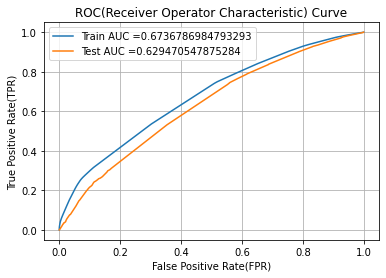

In [39]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

model = DecisionTreeClassifier(class_weight = 'balanced', 
                                  max_depth=best_max_depth_tfidf, min_samples_split=best_min_samples_split_tfidf)
model.fit(X_tr_set_1, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(model, X_tr_set_1)    
y_test_pred = batch_predict(model, X_te_set_1)

train_fpr_tfidf, train_tpr_tfidf, tr_thresholds_tfidf = roc_curve(y_train, y_train_pred)
test_fpr_tfidf, test_tpr_tfidf, te_thresholds_tfidf = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr_tfidf, train_tpr_tfidf, label="Train AUC ="+str(auc(train_fpr_tfidf, train_tpr_tfidf)))
plt.plot(test_fpr_tfidf, test_tpr_tfidf, label="Test AUC ="+str(auc(test_fpr_tfidf, test_tpr_tfidf)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("ROC(Receiver Operator Characteristic) Curve") 
plt.grid()
plt.show()

In [40]:
import seaborn as sns; sns.set()
from mlxtend.plotting import plot_confusion_matrix

best_t = find_best_threshold(tr_thresholds_tfidf, train_fpr_tfidf, train_tpr_tfidf)

The maximum value of tpr*(1-fpr)  0.3738199607236437  for threshold  0.537


 Train Confusion Matrix



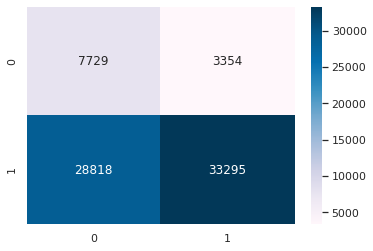

In [41]:
print("="*50)
print(" Train Confusion Matrix") 
print("="*50)
fig, ax1 = plt.subplots(1,1)
sns.heatmap(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), cmap="PuBu", annot=True, fmt="d", ax =ax1)
print()

 Test Confusion Matrix


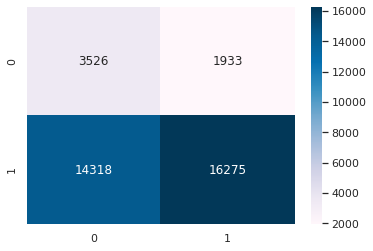

In [42]:
fig, ax2 = plt.subplots(1,1)
print("="*50)
print(" Test Confusion Matrix") 
print("="*50)
sns.heatmap(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), cmap="PuBu", annot=True, fmt="d", ax =ax2)

<h5>SET 1 - false positive data-points</h5>

In [0]:
predictions=predict_with_best_t(y_train_pred, best_t)

#https://www.google.com/search?q=geeks+for+geeks+false+positive&rlz=1C1SQJL_enIN849IN849&oq=geeks+for+geeks+false+positive&aqs=chrome..69i57j33l5.6431j0j7&sourceid=chrome&ie=UTF-8
#https://github.com/pskadasi/DecisionTrees_DonorsChoose/blob/master/Copy_of_8_DonorsChoose_DT_(1).ipynb
fpd = []
for i in range(len(y_test)) :
    if (y_test[i] == 0) and (predictions[i] == 1) :
#     if (y_test.values[i] == 0) & (predictions[i] == 1) :
        fpd.append(i)


<h5>SET 1 - WordCloud with the 'preprocessed_essay' of these 'false positive data points'</h5>

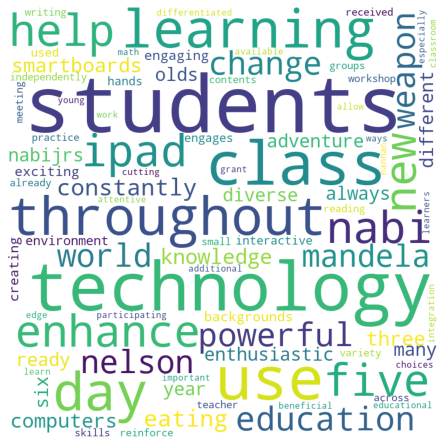

In [44]:

fp_essay = []
for i in fpd :
    fp_essay.append(X_test['preprocessed_essay'].values[i])

from wordcloud import WordCloud, STOPWORDS
comment_words = ' '
stopwords = set(STOPWORDS)
for val in fp_essay :
    val = str(val)
    tokens = val.split()
for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
for words in tokens :
    comment_words = comment_words + words + ' '
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords,min_font_size = 10).generate(comment_words)

plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

<h5>SET 1 - Box-plot with the 'price' of these 'false positive data points'</h5>

In [45]:
cols = X_test.columns
X_test_falsePos = pd.DataFrame(columns=cols)

for i in fpd: # (all the false positives data points indexes)
    X_test_falsePos = X_test_falsePos.append(X_test.filter(items=[i], axis=0))

X_test_falsePos.head(1)
len(X_test_falsePos)

900

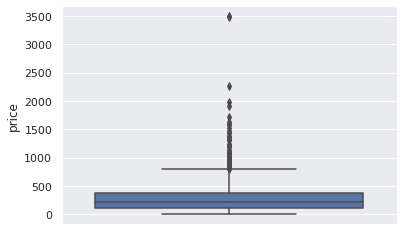

In [46]:
sns.boxplot(y='price', data=X_test_falsePos)

<h5>SET 1 - PDF with the 'teacher_number_of_previously_posted_projects' of these 'false positive data points'</h5>

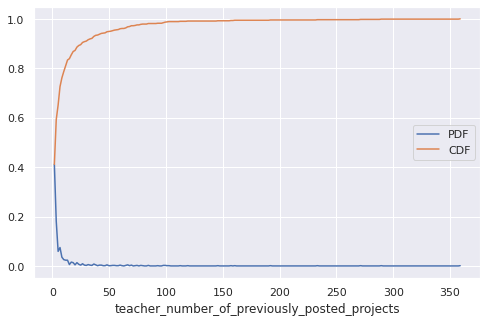

In [47]:
plt.figure(figsize=(8,5))
counts, bin_edges = np.histogram(X_test_falsePos['teacher_number_of_previously_posted_projects'], bins='auto', density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
pdfP, = plt.plot(bin_edges[1:], pdf)
cdfP, = plt.plot(bin_edges[1:], cdf)
plt.legend([pdfP, cdfP], ["PDF", "CDF"])
plt.xlabel('teacher_number_of_previously_posted_projects')
plt.show()

<h4>TFIDF W2V</h4>

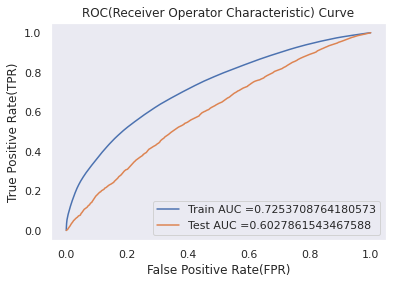

In [48]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

model = DecisionTreeClassifier(class_weight = 'balanced', 
                                  max_depth=best_max_depth_tfidf_w2v, min_samples_split=best_min_samples_split_tfidf_w2v)
model.fit(X_tr_set_2, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(model, X_tr_set_2)    
y_test_pred = batch_predict(model, X_te_set_2)

train_fpr_tfidf_w2v, train_tpr_tfidf_w2v, tr_thresholds_tfidf_w2v = roc_curve(y_train, y_train_pred)
test_fpr_tfidf_w2v, test_tpr_tfidf_w2v, te_thresholds_tfidf_w2v = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr_tfidf_w2v, train_tpr_tfidf_w2v, label="Train AUC ="+str(auc(train_fpr_tfidf_w2v, train_tpr_tfidf_w2v)))
plt.plot(test_fpr_tfidf_w2v, test_tpr_tfidf_w2v, label="Test AUC ="+str(auc(test_fpr_tfidf_w2v, test_tpr_tfidf_w2v)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("ROC(Receiver Operator Characteristic) Curve") 
plt.grid()
plt.show()

In [49]:
import seaborn as sns; sns.set()
from mlxtend.plotting import plot_confusion_matrix

best_t = find_best_threshold(tr_thresholds_tfidf_w2v, train_fpr_tfidf_w2v, train_tpr_tfidf_w2v)

The maximum value of tpr*(1-fpr)  0.44140669308577785  for threshold  0.49


 Train Confusion Matrix



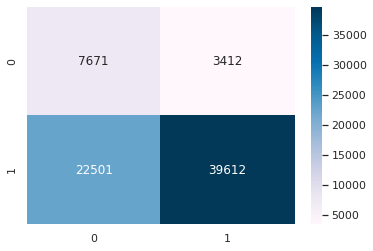

In [50]:
print("="*50)
print(" Train Confusion Matrix") 
print("="*50)
fig, ax1 = plt.subplots(1,1)
sns.heatmap(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), cmap="PuBu", annot=True, fmt="d", ax =ax1)
print()

 Test Confusion Matrix


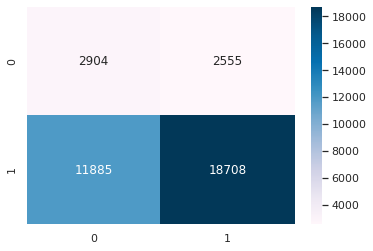

In [51]:
fig, ax2 = plt.subplots(1,1)
print("="*50)
print(" Test Confusion Matrix") 
print("="*50)
sns.heatmap(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), cmap="PuBu", annot=True, fmt="d", ax =ax2)

<h5>SET 2 - false positive data-points</h5>

In [0]:
predictions=predict_with_best_t(y_train_pred, best_t)

#https://www.google.com/search?q=geeks+for+geeks+false+positive&rlz=1C1SQJL_enIN849IN849&oq=geeks+for+geeks+false+positive&aqs=chrome..69i57j33l5.6431j0j7&sourceid=chrome&ie=UTF-8
#https://github.com/pskadasi/DecisionTrees_DonorsChoose/blob/master/Copy_of_8_DonorsChoose_DT_(1).ipynb
fpd = []
for i in range(len(y_test)) :
    if (y_test[i] == 0) and (predictions[i] == 1) :
#     if (y_test.values[i] == 0) & (predictions[i] == 1) :
        fpd.append(i)


<h5>SET 2 - WordCloud with the 'preprocessed_essay' of these 'false positive data points'</h5>

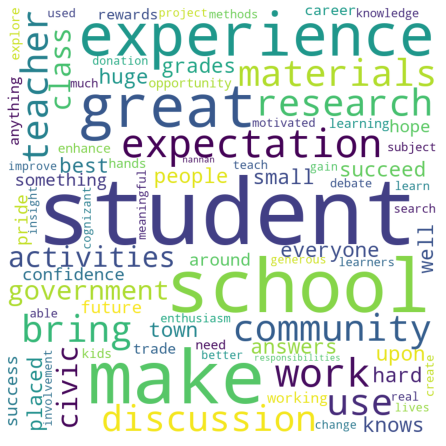

In [53]:
fp_essay = []
for i in fpd :
    fp_essay.append(X_test['preprocessed_essay'].values[i])

from wordcloud import WordCloud, STOPWORDS
comment_words = ' '
stopwords = set(STOPWORDS)
for val in fp_essay :
    val = str(val)
    tokens = val.split()
for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
for words in tokens :
    comment_words = comment_words + words + ' '
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords,min_font_size = 10).generate(comment_words)

plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

<h5>SET 2 - Box-plot with the 'price' of these 'false positive data points'</h5>

In [54]:
cols = X_test.columns
X_test_falsePos = pd.DataFrame(columns=cols)


for i in fpd: # (in fpi all the false positives data points indexes)
    X_test_falsePos = X_test_falsePos.append(X_test.filter(items=[i], axis=0))

X_test_falsePos.head(1)
len(X_test_falsePos)

1046

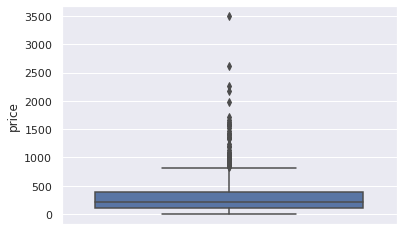

In [55]:
sns.boxplot(y='price', data=X_test_falsePos)

<h5>SET 2 - PDF with the 'teacher_number_of_previously_posted_projects' of these 'false positive data points'</h5>

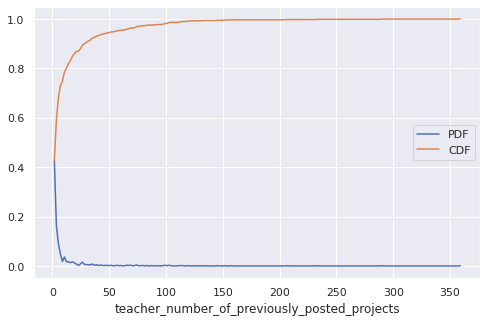

In [56]:
plt.figure(figsize=(8,5))
counts, bin_edges = np.histogram(X_test_falsePos['teacher_number_of_previously_posted_projects'], bins='auto', density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
pdfP, = plt.plot(bin_edges[1:], pdf)
cdfP, = plt.plot(bin_edges[1:], cdf)
plt.legend([pdfP, cdfP], ["PDF", "CDF"])
plt.xlabel('teacher_number_of_previously_posted_projects')
plt.show()

<h5>feature_importances</h5>

In [0]:
feature_imp = clf_1.best_estimator_.feature_importances_

In [0]:
non_zero_feature_imp_idx = [i for i, a in enumerate(feature_imp) if a != 0]

In [0]:
non_zero_feature_name = []
for a in non_zero_feature_imp_idx:
    non_zero_feature_name.append(tfidf_features[a])

In [0]:
col_range_1 = essay_train_tfidf.shape[1]
col_range_2 = essay_train_tfidf.shape[1] + title_train_tfidf.shape[1]
col_range_3 = essay_train_tfidf.shape[1] + title_train_tfidf.shape[1] + X_tr_state_ohe.shape[1]
col_range_4 = essay_train_tfidf.shape[1] + title_train_tfidf.shape[1] + X_tr_state_ohe.shape[1] + X_tr_teacher_ohe.shape[1]
col_range_5 = essay_train_tfidf.shape[1] + title_train_tfidf.shape[1] + X_tr_state_ohe.shape[1] + X_tr_teacher_ohe.shape[1] + X_tr_grade_ohe.shape[1]
col_range_6 = essay_train_tfidf.shape[1] + title_train_tfidf.shape[1] + X_tr_state_ohe.shape[1] + X_tr_teacher_ohe.shape[1] + X_tr_grade_ohe.shape[1] + X_tr_category_ohe.shape[1]
col_range_7 = essay_train_tfidf.shape[1] + title_train_tfidf.shape[1] + X_tr_state_ohe.shape[1] + X_tr_teacher_ohe.shape[1] + X_tr_grade_ohe.shape[1] + X_tr_category_ohe.shape[1] + X_tr_subcategory_ohe.shape[1]
col_range_8 = essay_train_tfidf.shape[1] + title_train_tfidf.shape[1] + X_tr_state_ohe.shape[1] + X_tr_teacher_ohe.shape[1] + X_tr_grade_ohe.shape[1] + X_tr_category_ohe.shape[1] + X_tr_subcategory_ohe.shape[1] + n1_train_norm.shape[1]
col_range_9 = essay_train_tfidf.shape[1] + title_train_tfidf.shape[1] + X_tr_state_ohe.shape[1] + X_tr_teacher_ohe.shape[1] + X_tr_grade_ohe.shape[1] + X_tr_category_ohe.shape[1] + X_tr_subcategory_ohe.shape[1] + n1_train_norm.shape[1] + n2_train_norm.shape[1]
col_range_10 = essay_train_tfidf.shape[1] + title_train_tfidf.shape[1] + X_tr_state_ohe.shape[1] + X_tr_teacher_ohe.shape[1] + X_tr_grade_ohe.shape[1] + X_tr_category_ohe.shape[1] + X_tr_subcategory_ohe.shape[1] + n1_train_norm.shape[1] + n2_train_norm.shape[1] + n3_train_norm.shape[1]

In [0]:
Column_names = []
for x in non_zero_feature_imp_idx:
    if x in range(col_range_1):
        if 'preprocessed_essay' not in Column_names:
            Column_names.append('preprocessed_essay')
            continue
    if x in range(col_range_1,col_range_2):
        if 'preprocessed_title' not in Column_names:
            Column_names.append('preprocessed_title')
            continue
    if x in range(col_range_2,col_range_3):
        if 'school_state' not in Column_names:
            Column_names.append('school_state')
            continue
    if x in range(col_range_3,col_range_4):
        if 'teacher_prefix_cleaned' not in Column_names:
            Column_names.append('teacher_prefix_cleaned')
            continue
    if x in range(col_range_4,col_range_5):
        if 'preprocessed_grade_category' not in Column_names:
            Column_names.append('preprocessed_grade_category')
            continue
    if x in range(col_range_5,col_range_6):
        if 'preprocessed_subject_categories' not in Column_names:
            Column_names.append('preprocessed_subject_categories')
            continue
    if x in range(col_range_6,col_range_7):
        if 'preprocessed_subject_subcategories' not in Column_names:
            Column_names.append('preprocessed_subject_subcategories')
            continue 
    if x in range(col_range_7,col_range_8):
        if 'teacher_number_of_previously_posted_projects' not in Column_names:
            Column_names.append('teacher_number_of_previously_posted_projects')
            continue  
    if x in range(col_range_8,col_range_9):
        if 'price' not in Column_names:
            Column_names.append('price')
            continue 
    if x in range(col_range_9,col_range_10):
        if 'quantity' not in Column_names:
            Column_names.append('quantity')
            continue            

In [62]:
Column_names

['preprocessed_essay',
 'preprocessed_title',
 'preprocessed_subject_subcategories',
 'teacher_number_of_previously_posted_projects']

In [0]:
Column_names.append('project_is_approved')

In [0]:
# data = pd.read_csv('preprocessed_data.csv') #,engine='python', encoding='utf-8', error_bad_lines=False)
# data.head(1)

data = pd.read_csv('task_2_data.csv') #,engine='python', encoding='utf-8', error_bad_lines=False)

In [65]:
data = data[Column_names]
data.head(2)

,preprocessed_essay,preprocessed_title,preprocessed_subject_subcategories,teacher_number_of_previously_posted_projects,project_is_approved
0,students english learners working english thei...,educational support english learners home,esl literacy,0,0
1,students arrive school eager learn polite gene...,wanted projector hungry learners,civics_government teamsports,7,1


In [0]:
data = data.dropna(how = 'any')
# data = data.reset_index(drop = True)

In [0]:
#Separating feature columns and target-column

y = data['project_is_approved']
X = data.drop(['project_is_approved'], axis=1)

In [0]:
#Splitting data into Train and cross validation(or test): Stratified Sampling

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    
from scipy.sparse import hstack

def tfidf_text(train_text, test_text):
    
   vectorizer = TfidfVectorizer(min_df = 1, ngram_range = (1, 4), max_features = 5000)
   vectorizer.fit(train_text.values)
    
#     Using fitted TfidfVectorizer to convert text to vector
   train_text_tfidf = vectorizer.transform(train_text.values)
#     cv_text_tfidf= vectorizer.transform(cv_text.values)
   test_text_tfidf = vectorizer.transform(test_text.values)
   text_features = vectorizer.get_feature_names()
    
#     Encoded values
   return train_text_tfidf, test_text_tfidf, vectorizer, text_features 

#tfidf essay
essay_train_tfidf, essay_test_tfidf, tfidf_vectorizer_1, essay_features = tfidf_text(X_train['preprocessed_essay'], X_test['preprocessed_essay'])

#tfidf title
title_train_tfidf, title_test_tfidf, tfidf_vectorizer_2, title_features = tfidf_text(X_train['preprocessed_title'], X_test['preprocessed_title'])

# tfidf_features = essay_features + title_features
# tfidf_features += tfidf_features

In [0]:
# # please write all the code with proper documentation, and proper titles for each subsection
# # go through documentations and blogs before you start coding 
# # first figure out what to do, and then think about how to do.
# # reading and understanding error messages will be very much helpfull in debugging your code
# # make sure you featurize train and test data separatly

# # when you plot any graph make sure you use 
#     # a. Title, that describes your plot, this will be very helpful to the reader
#     # b. Legends if needed
#     # c. X-axis label
#     # d. Y-axis label
    
from sklearn.preprocessing import Normalizer
# from scipy.sparse import hstack

def normalize_numeric(train_num, test_num):
   norm = Normalizer()
   norm.fit(train_num.values.reshape(-1, 1))
    
   train_num_norm = norm.transform(train_num.values.reshape(-1, 1))
#     cv_num_norm = norm.transform(cv_num.values.reshape(-1, 1))
   test_num_norm = norm.transform(test_num.values.reshape(-1, 1))
   return train_num_norm, test_num_norm

# normalize teacher_number_of_previously_posted_projects
n_train_norm, n_test_norm = normalize_numeric(X_train['teacher_number_of_previously_posted_projects'], X_test['teacher_number_of_previously_posted_projects'])
# # # normalize price
# # n2_train_norm, n2_test_norm = normalize_numeric(X_train['price'], X_test['price'])
                                                                  
# # # normalize quantity
# # n3_train_norm, n3_test_norm = normalize_numeric(X_train['quantity'], X_test['quantity'])

# # tfidf_features += ['teacher_number_of_previously_posted_projects'] + ['price'] + ['quantity']
# # tfidf_w2v_features += ['teacher_number_of_previously_posted_projects'] + ['price'] + ['quantity']

In [0]:
# # encoding categorical features: school_state
# vectorizer = CountVectorizer()
# vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data
# # we use the fitted CountVectorizer to convert the text to vector
# X_tr_state_ohe = vectorizer.transform(X_train['school_state'].values)
# # X_cv_state_ohe = vectorizer.transform(X_cv['school_state'].values)
# X_te_state_ohe = vectorizer.transform(X_test['school_state'].values)
# # tfidf_features += vectorizer.get_feature_names()
# # tfidf_w2v_features += vectorizer.get_feature_names()

# # encoding categorical features: preprocessed_subject_categories
# vectorizer = CountVectorizer()
# vectorizer.fit(X_train['preprocessed_subject_categories'].values) # fit has to happen only on train data
# # we use the fitted CountVectorizer to convert the text to vector
# X_tr_category_ohe = vectorizer.transform(X_train['preprocessed_subject_categories'].values)
# # X_cv_category_ohe = vectorizer.transform(X_cv['preprocessed_subject_categories'].values)
# X_te_category_ohe = vectorizer.transform(X_test['preprocessed_subject_categories'].values)
# tfidf_features += vectorizer.get_feature_names()
# tfidf_w2v_features += vectorizer.get_feature_names()
    
# encoding categorical features: preprocessed_subject_subcategories
vectorizer = CountVectorizer()
vectorizer.fit(X_train['preprocessed_subject_subcategories'].values) # fit has to happen only on train data
# we use the fitted CountVectorizer to convert the text to vector
X_tr_subcategory_ohe = vectorizer.transform(X_train['preprocessed_subject_subcategories'].values)
# X_cv_subcategory_ohe = vectorizer.transform(X_cv['preprocessed_subject_subcategories'].values)
X_te_subcategory_ohe = vectorizer.transform(X_test['preprocessed_subject_subcategories'].values)
# # tfidf_features += vectorizer.get_feature_names()
# # tfidf_w2v_features += vectorizer.get_feature_names()

# # encoding categorical features: preprocessed_grade_category
# vectorizer = CountVectorizer()
# vectorizer.fit(X_train['preprocessed_grade_category'].values) # fit has to happen only on train data
# # we use the fitted CountVectorizer to convert the text to vector
# X_tr_grade_ohe = vectorizer.transform(X_train['preprocessed_grade_category'].values)
# # X_cv_grade_ohe = vectorizer.transform(X_cv['preprocessed_grade_category'].values)
# X_te_grade_ohe = vectorizer.transform(X_test['preprocessed_grade_category'].values)
# # tfidf_features += vectorizer.get_feature_names()
# # tfidf_w2v_features += vectorizer.get_feature_names()

In [0]:
# With the same hstack function we are concatinating a sparse matrix and a dense matrix

_X_train = hstack((essay_train_tfidf, title_train_tfidf,  X_tr_subcategory_ohe, n_train_norm)).tocsr()
# X_cv_set_2 = hstack((essay_cv_tfidf, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_category_ohe, X_cv_subcategory_ohe, X_cv_grade_ohe, n1_cv_norm, n2_cv_norm)).tocsr()
_X_test = hstack((essay_test_tfidf, title_test_tfidf, X_te_subcategory_ohe, n_test_norm)).tocsr()

Training (Hyper-parameter Tuning)

In [73]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
import math
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
import numpy as np

model_DT = DecisionTreeClassifier(class_weight = 'balanced')

parameters = {'max_depth': [1, 5, 10, 50], 'min_samples_split': [5, 10,100,500]}

task_2_clf = RandomizedSearchCV(model_DT, parameters, return_train_score=True, scoring='roc_auc', n_jobs= -1)
task_2_clf.fit(_X_train, y_train)

results = pd.DataFrame.from_dict(task_2_clf.cv_results_)
results = results.sort_values(['param_min_samples_split'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
# alphas =  results['param_alpha']
max_depth = results['param_max_depth'] 
min_samples_split =  results['param_min_samples_split']

from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(xs=min_samples_split, ys=max_depth, zs=train_auc, c='b', marker='o', label='blue')
ax.scatter(xs=min_samples_split, ys=max_depth, zs=cv_auc, c='g', marker='D', label='green')

ax.set_xlabel('min_samples_split')
ax.set_ylabel('max_depth')
ax.set_zlabel('AUC')
plt.title("3D Scatter Plot Example")
plt.legend()
plt.tight_layout()
plt.show()

############################################################################
# # https://plot.ly/python/3d-axes/
# trace1 = go.Scatter3d(x=min_samples_split, y=max_depth, z=train_auc, name='Train')
# trace2 = go.Scatter3d(x=min_samples_split, y=max_depth, z=cv_auc, name='Cross-validation')
# data = [trace1, trace2]

# layout = go.Layout(scene = dict(
#         xaxis = dict(title='min_samples_split'),
#         yaxis = dict(title='max_depth'),
#         zaxis = dict(title='AUC'),))

# fig = go.Figure(data=data, layout=layout)
# offline.iplot(fig, filename='3d-scatter-colorscale')
############################################################################
# # log_alphas =[]
# # for a in alphas:
# #     log_alphas.append(math.log(a))

# # plt.figure(figsize=(10,10))

# # plt.plot(log_alphas, train_auc, label='Train AUC')
# # # this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# # # plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

# # plt.plot(log_alphas, cv_auc, label='CV AUC')
# # # this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# # # plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

# plt.scatter(log_alphas, train_auc, label='Train AUC points')
# plt.scatter(log_alphas, cv_auc, label='CV AUC points')

# plt.legend()
# plt.xlabel("Hyper-parameter")
# plt.ylabel("Area under ROC Curve")
# plt.title("Hyper-parameter vs Area under ROC Curve")
# plt.grid()
# plt.show()

results.head(2)

Output hidden; open in https://colab.research.google.com to view.

In [74]:
print(task_2_clf.best_estimator_)
_max_depth_tfidf = task_2_clf.best_estimator_.max_depth
_min_samples_split_tfidf = task_2_clf.best_estimator_.min_samples_split

print('Best value of hyper-parameter(max_depth) by RandomizedSearchCV on TFIDF Vectorization: ', _max_depth_tfidf)
print('Best value of hyper-parameter(min_samples_split) by RandomizedSearchCV on TFIDF Vectorization: ', _min_samples_split_tfidf)
print('Best score: ', task_2_clf.best_score_)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Best value of hyper-parameter(max_depth) by RandomizedSearchCV on TFIDF Vectorization:  10
Best value of hyper-parameter(min_samples_split) by RandomizedSearchCV on TFIDF Vectorization:  10
Best score:  0.6249179693298459


Testing

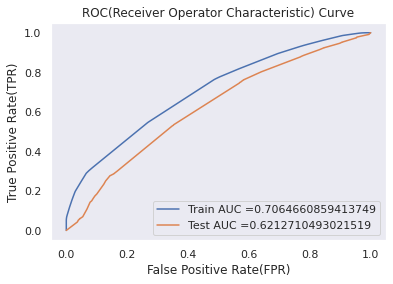

In [75]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

model = DecisionTreeClassifier(class_weight = 'balanced', 
                                  max_depth=_max_depth_tfidf, min_samples_split=_min_samples_split_tfidf)
model.fit(_X_train, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(model, _X_train)    
y_test_pred = batch_predict(model, _X_test)

train_fpr_tfidf, train_tpr_tfidf, tr_thresholds_tfidf = roc_curve(y_train, y_train_pred)
test_fpr_tfidf, test_tpr_tfidf, te_thresholds_tfidf = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr_tfidf, train_tpr_tfidf, label="Train AUC ="+str(auc(train_fpr_tfidf, train_tpr_tfidf)))
plt.plot(test_fpr_tfidf, test_tpr_tfidf, label="Test AUC ="+str(auc(test_fpr_tfidf, test_tpr_tfidf)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("ROC(Receiver Operator Characteristic) Curve") 
plt.grid()
plt.show()

In [76]:
import seaborn as sns; sns.set()
from mlxtend.plotting import plot_confusion_matrix

best_t = find_best_threshold(tr_thresholds_tfidf, train_fpr_tfidf, train_tpr_tfidf)

The maximum value of tpr*(1-fpr)  0.40054167217820846  for threshold  0.505


 Train Confusion Matrix



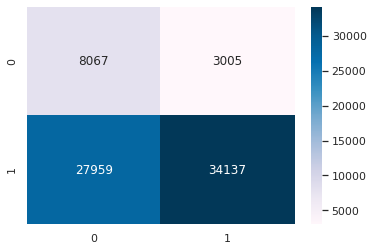

In [77]:
print("="*50)
print(" Train Confusion Matrix") 
print("="*50)
fig, ax1 = plt.subplots(1,1)
sns.heatmap(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), cmap="PuBu", annot=True, fmt="d", ax =ax1)
print()

 Test Confusion Matrix


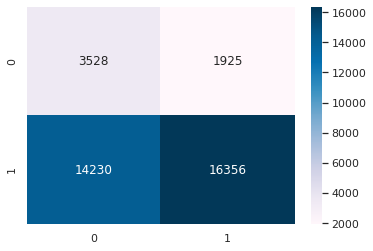

In [78]:
fig, ax2 = plt.subplots(1,1)
print("="*50)
print(" Test Confusion Matrix") 
print("="*50)
sns.heatmap(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), cmap="PuBu", annot=True, fmt="d", ax =ax2)

<h5> false positive data-points</h5>

In [0]:
predictions=predict_with_best_t(y_train_pred, best_t)

index_list = list(X_test.index)
fpd = []
j = 0
for i in index_list:
    if y_test[i] == 0 and predictions[j]== 1:
        fpd.append(i)
    j += 1 
df = X_test.loc[fpd]

<h5>WordCloud with the 'preprocessed_essay' of these 'false positive data points'</h5>

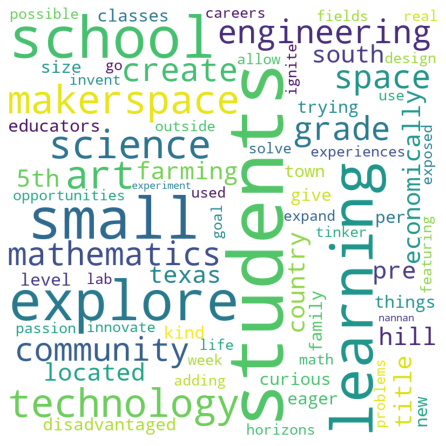

In [94]:
fp_essay = []
for i in range(df.shape[0]):
    fp_essay.append(df['preprocessed_essay'].values[i])

from wordcloud import WordCloud, STOPWORDS
comment_words = ' '
stopwords = set(STOPWORDS)
for val in fp_essay :
    val = str(val)
    tokens = val.split()
for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
for words in tokens :
    comment_words = comment_words + words + ' '
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords,min_font_size = 10).generate(comment_words)

plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

<h5>Box-plot with the 'price' of these 'false positive data points'</h5>

<h5>PDF with the 'teacher_number_of_previously_posted_projects' of these 'false positive data points'</h5>

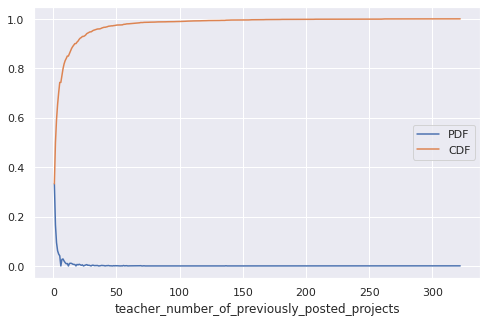

In [96]:
plt.figure(figsize=(8,5))
counts, bin_edges = np.histogram(df['teacher_number_of_previously_posted_projects'], bins='auto', density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
pdfP, = plt.plot(bin_edges[1:], pdf)
cdfP, = plt.plot(bin_edges[1:], cdf)
plt.legend([pdfP, cdfP], ["PDF", "CDF"])
plt.xlabel('teacher_number_of_previously_posted_projects')
plt.show()

<h1>Summary</h1>

In [97]:
from prettytable import PrettyTable
    
x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Best max_depth", "Best min_samples_split","AUC_Train","AUC_Test"]
x.add_row(["TFIDF", "DecisionTreeClassifier", f"{best_max_depth_tfidf}", f"{best_min_samples_split_tfidf}", str(auc(train_fpr_tfidf, train_tpr_tfidf)),str(auc(test_fpr_tfidf, test_tpr_tfidf))])
x.add_row(["TFIDF W2V", "DecisionTreeClassifier",f"{best_max_depth_tfidf_w2v}", f"{best_min_samples_split_tfidf_w2v}", str(auc(train_fpr_tfidf_w2v, train_tpr_tfidf_w2v)),str(auc(test_fpr_tfidf_w2v, test_tpr_tfidf_w2v))])

print(x)

+------------+------------------------+----------------+------------------------+--------------------+--------------------+
| Vectorizer |         Model          | Best max_depth | Best min_samples_split |     AUC_Train      |      AUC_Test      |
+------------+------------------------+----------------+------------------------+--------------------+--------------------+
|   TFIDF    | DecisionTreeClassifier |       10       |          500           | 0.7064660859413749 | 0.6212710493021519 |
| TFIDF W2V  | DecisionTreeClassifier |       10       |          500           | 0.7253708764180573 | 0.6027861543467588 |
+------------+------------------------+----------------+------------------------+--------------------+--------------------+


References:-
 1. https://stackoverflow.com/
 2. https://github.com/
 3. https://towardsdatascience.com/ 
 4. https://scikit-learn.org/
 5. https://pythonspot.com/
 6. https://machinelearningmastery.com/
 7. https://stackexchange.com/